In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#hide
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.7 MB/s eta 0:00:00a 0:00:01


In [5]:
#hide
import fastbook
fastbook.setup_book()


In [6]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [7]:
!export AZURE_SEARCH_KEY=da5f2ac0856f4e5fb281581c1288089d

In [8]:
key = os.environ.get('AZURE_SEARCH_KEY', 'da5f2ac0856f4e5fb281581c1288089d')

In [9]:
key

'da5f2ac0856f4e5fb281581c1288089d'

In [10]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [11]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

In [12]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']


In [13]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)


Path('images/grizzly.jpg')

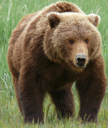

In [14]:

im = Image.open(dest)
im.to_thumb(128,128)

In [15]:

bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [16]:

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [17]:
fns = get_image_files(path)
fns

(#433) [Path('bears/black/977489d6-5b9a-4ab9-8a6f-637966417835.jpg'),Path('bears/black/10c7a642-4721-4ee6-b18b-1c0a7abc61f5.jpg'),Path('bears/black/9ad1419e-6f24-4def-9a7f-126fe3ccb74c.jpg'),Path('bears/black/dd369ded-74c6-4ff7-9f16-74b56787176d.jpeg'),Path('bears/black/bdcfa958-81f5-40ef-975c-fc3721655d16.jpg'),Path('bears/black/f5baed9d-808d-484a-b290-0b4709422518.jpg'),Path('bears/black/e663f2ab-877d-49b8-9eba-98e47f8973ed.jpg'),Path('bears/black/5c69eae7-2fc1-4198-abf8-3c61fb7c9199.jpg'),Path('bears/black/e54891e0-1ee6-4cff-acc2-8ca156bbe631.jpg'),Path('bears/black/eea35c7d-ed98-4203-9300-35fec2bd5c74.jpg')...]

In [18]:

failed = verify_images(fns)
failed

(#13) [Path('bears/black/cb9add83-6e36-434b-9435-3f279e706f23.jpg'),Path('bears/teddy/03e45351-cefc-49dd-80ea-9a605deaebb5.jpg'),Path('bears/teddy/09fc8833-b1cd-400b-a401-c9842e309eb4.JPG'),Path('bears/teddy/6b1811aa-a34d-41a7-8f8a-a4bb242ba083.jpg'),Path('bears/teddy/96b5c064-43d4-485b-b47b-a021c5b27ea4.jpg'),Path('bears/teddy/53cbeab2-eaf0-40ac-8c74-7f49feb69e30.JPG'),Path('bears/teddy/8470b9f4-f12c-4350-904a-be3040433336.JPG'),Path('bears/teddy/83995af1-3cd8-401e-91f8-e194e443574a.JPG'),Path('bears/teddy/a2a1d3f1-93af-443b-b63e-920d509f39f5.JPG'),Path('bears/teddy/dddbbdec-1715-4cdd-8062-7aa0cbb7bfc4.jpg')...]

In [19]:
failed.map(Path.unlink);

In [20]:
??verify_images

Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      /opt/conda/lib/python3.10/site-packages/fastai/vision/utils.py
Type:      function

In [21]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [22]:
dls = bears.dataloaders(path)


In [23]:
path

Path('bears')

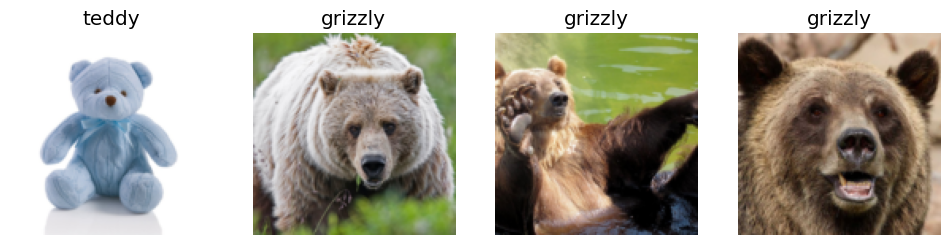

In [24]:

dls.valid.show_batch(max_n=4, nrows=1)

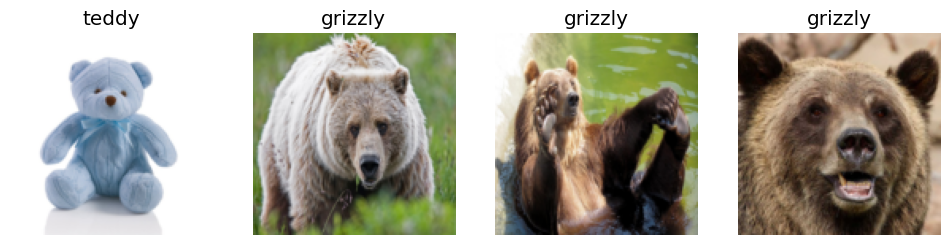

In [25]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

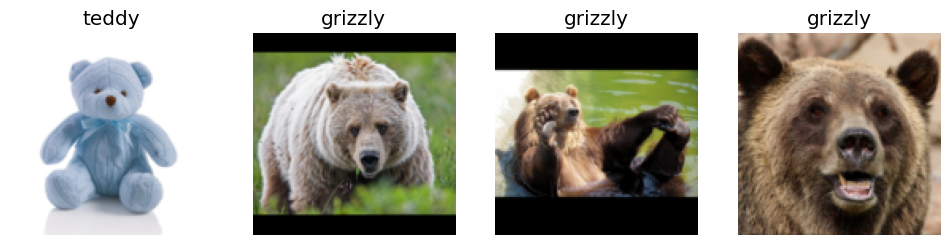

In [26]:

bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

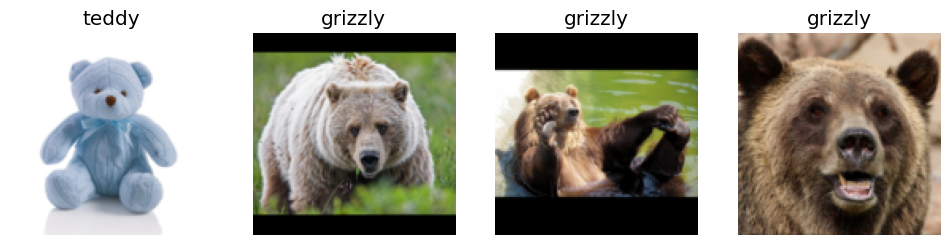

In [27]:

bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

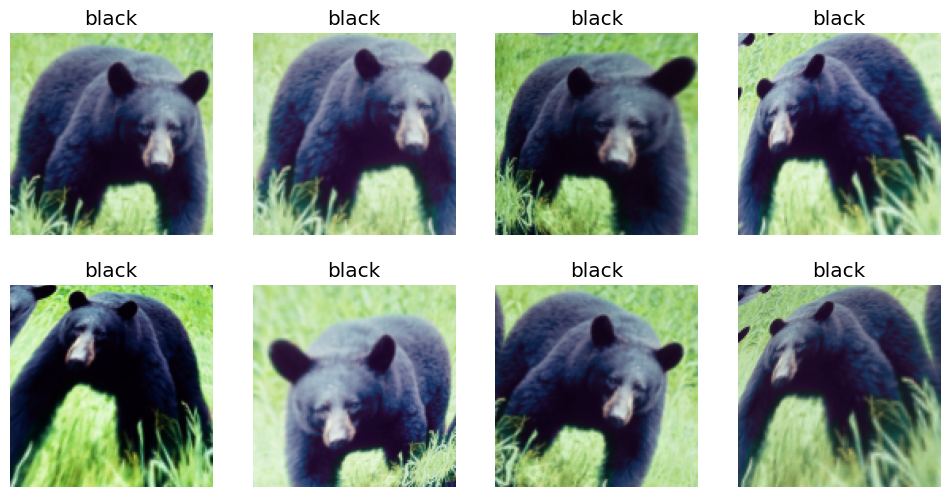

In [28]:

bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [29]:

bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [30]:

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 189MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.374526,0.174316,0.047619,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.236134,0.228673,0.071429,01:43
1,0.180987,0.208346,0.035714,01:28
2,0.148403,0.230223,0.059524,01:07
3,0.128051,0.222339,0.059524,01:07


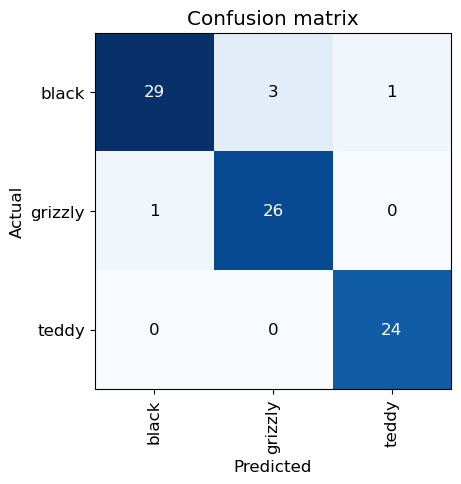

In [31]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

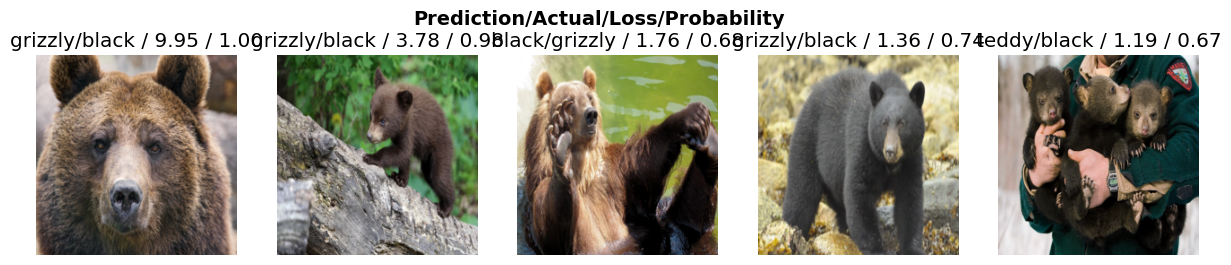

In [32]:
interp.plot_top_losses(5, nrows=1)


In [33]:

#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [34]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [35]:
learn.export()

In [36]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [37]:
learn_inf = load_learner(path/'export.pkl')

In [38]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([1.6125e-05, 9.9998e-01, 3.9155e-06]))

In [39]:
learn_inf.dls.vocab


['black', 'grizzly', 'teddy']

In [40]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [41]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [43]:
img = PILImage.create(btn_upload.data[-1])


In [44]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [45]:
pred,pred_idx,probs = learn_inf.predict(img)


In [46]:

#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [47]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [48]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [49]:

#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [50]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [51]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.5/347.5 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter_client 7.4.9
    Uninstalling jupyter_client-7.4.9:
      Successfully uninstalled jupyter_client-7.4.9
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter_server 2.6.0
    Uninstalling jupyter_server-2.6.0:
      Successfully uninstalled jupyter_server-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-lsp 4.2.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
Config option `kernel_spec_manager_class` not recognized by `EnableServerExtensionApp`.
Enabling: voil